# Bussiness Case -: To build a NLP Based ML Model for Prediction of Base Score of a Drug

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import string
from nltk.corpus import stopwords
from nltk import SyllableTokenizer
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
import spacy
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')
import nltk
import re
from nltk.corpus import stopwords

### Loading Data Set

In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\Downloads\916e0d48-7-dataset\dataset\train.csv')

In [3]:
df_test = pd.read_csv(r'C:\Users\LENOVO\Downloads\916e0d48-7-dataset\dataset\test.csv')

In [4]:
df_s = pd.DataFrame(df_test['patient_id'])

### Basic Checks

In [5]:
df.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [6]:
df_test.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2


In [7]:
print('The shape of Training set is:' ,df.shape)
print('The shape of Test set is:' ,df_test.shape)

The shape of Training set is: (32165, 8)
The shape of Test set is: (10760, 7)


Observations -:
1. There are 11 Features and 32165 Observations in Training Set.
2. There are 7 Features and 10760 Observations in Test Set.

In [8]:
df.describe()

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000,32165.000000
mean,115487.511052,6.998912,27.893207,6.664261
std,67146.156602,3.274781,35.819035,1.588699
min,9.000000,1.000000,0.000000,0.899076
25%,56922.000000,5.000000,6.000000,6.109307
50%,115776.000000,8.000000,16.000000,6.788245
75%,173562.000000,10.000000,36.000000,7.900790
max,232289.000000,10.000000,771.000000,8.992453


Observations -:
1. 'Effective Rating' ranges from 0 to 1 & has No Null Values.
2. 'Number of Times Prescribed' ranges from 0 to 1 & has No Null Values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  32165 non-null  int64  
 1   name_of_drug                32165 non-null  object 
 2   use_case_for_drug           32165 non-null  object 
 3   review_by_patient           32165 non-null  object 
 4   effectiveness_rating        32165 non-null  int64  
 5   drug_approved_by_UIC        32165 non-null  object 
 6   number_of_times_prescribed  32165 non-null  int64  
 7   base_score                  32165 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


Observations -:
1. There are No Null Values in the Dataset.
2. The DataTypes are - 'object', 'float' & 'int'

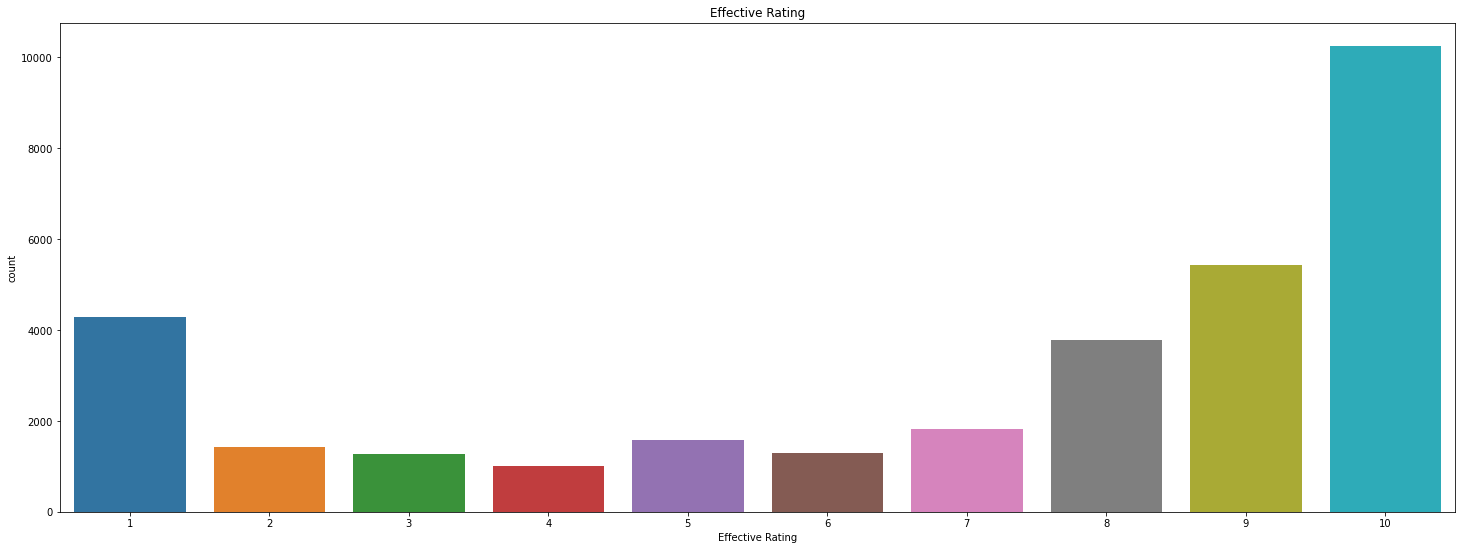

In [10]:
plt.figure(figsize=(25,9))
sns.countplot(x=df['effectiveness_rating'],)
plt.title('Effective Rating')
plt.xlabel('Effective Rating')
plt.show()

Observations -:
1. Maximum number of patients has given the rating of Drugs as 10.
2. Minimum number of patients has given the rating of Drugs as 4.
3. There are appreciable number of patients, who have given the rating of Drugs as 1

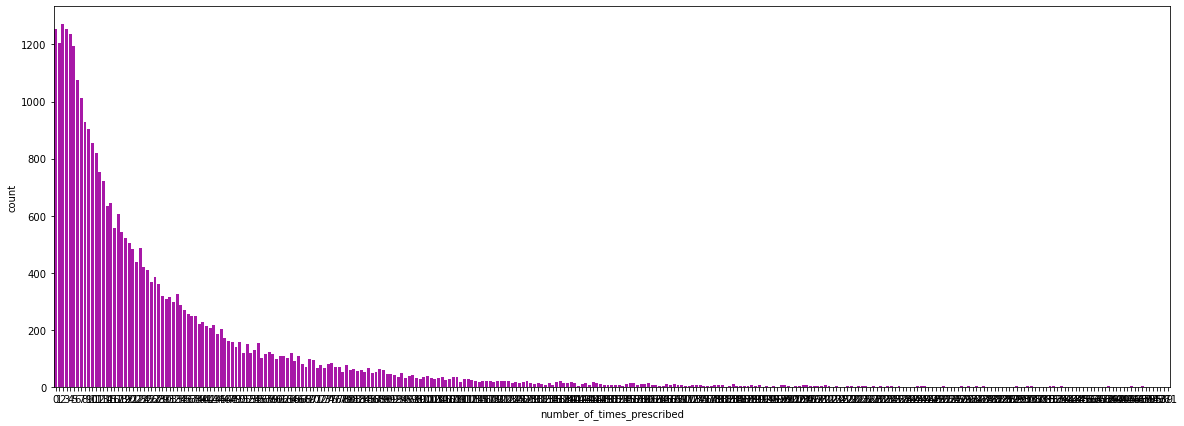

In [11]:
plt.figure(figsize=(20,7))
sns.countplot(x=df['number_of_times_prescribed'], color='m')
plt.xlabel('number_of_times_prescribed')
plt.show()

Observations -:
1. Two times prescribed Drugs have highest count.
2. Zero time prescribed Drugs have second highest count.
3. It has been found that many Drugs are prescribed only once.

# Preprocessing Data

## Punctuation Marks

In [12]:
## Function for removal of Punctuation Marks

def rem_punctuation(m_str, keep_apostrophe = False):
    m_str = m_str.strip()
    if keep_apostrophe:
        PATTERN = r'[?|$|&|*|%|@|(|)|~]'
        filtered_sentence = re.sub(PATTERN, r' ', m_str)
    else :
        PATTERN = r'[^a-zA-Z0-9]'
        filtered_sentence = re.sub(PATTERN, r' ', m_str)
    return(filtered_sentence)


In [13]:
## Removal of punctuation marks

df['review_by_patient'] = df['review_by_patient'].apply(rem_punctuation)
df_test['review_by_patient'] = df_test['review_by_patient'].apply(rem_punctuation)

## Stopword Removal

In [14]:
## Function for removal of Stop Words

stop = stopwords.words('english')
stop.append("im")

def rem_stopword(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop ]


In [15]:
## Removal of stop words

df['review_by_patient'] = df['review_by_patient'].astype(str)
df_test['review_by_patient'] = df_test['review_by_patient'].astype(str)
df['review_by_patient'] = df['review_by_patient'].apply(rem_stopword)
df_test['review_by_patient'] = df_test['review_by_patient'].apply(rem_stopword)

## Dropping Numbers

In [16]:
## Function for removing numbers in review

def rem_number(m_str):
    m_str_new = []
    for i in m_str:
        if not re.search('\d', i):
            m_str_new.append(i)
    return ' '.join(m_str_new)

In [17]:
## Removal of numbers

df['review_by_patient'] = df['review_by_patient'].apply(rem_number)
df_test['review_by_patient'] = df_test['review_by_patient'].apply(rem_number)

## Sentiment Analysis

In [18]:
## Sentiment column creation and Analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

df['sent_score'] = df['review_by_patient'].apply(lambda review_by_patient: sid.polarity_scores(review_by_patient))

df['sent_comp'] = df['sent_score'].apply(lambda score_dict: score_dict['compound'])

df['sentiment'] = df['sent_comp'].apply(lambda c: 'positive' if c >=0 else 'negative')

In [19]:
df_test['sent_score'] = df_test['review_by_patient'].apply(lambda review_by_patient: sid.polarity_scores(review_by_patient))

df_test['sent_comp'] = df_test['sent_score'].apply(lambda score_dict: score_dict['compound'])

df_test['sentiment'] = df_test['sent_comp'].apply(lambda c: 'positive' if c >=0 else 'negative')

In [20]:
df.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,sent_score,sent_comp,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,side effect take combination bystolic mg fish oil,9,20-May-12,27,8.022969,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8,27-Apr-10,192,7.858458,"{'neg': 0.035, 'neu': 0.756, 'pos': 0.209, 'co...",0.9068,positive
2,92703,Lybrel,Birth Control,used take another oral contraceptive pill cycl...,5,14-Dec-09,17,6.341969,"{'neg': 0.065, 'neu': 0.802, 'pos': 0.133, 'co...",0.7506,positive
3,35696,Buprenorphine / naloxone,Opiate Dependence,suboxone completely turned life around feel he...,9,27-Nov-16,37,6.590176,"{'neg': 0.109, 'neu': 0.589, 'pos': 0.302, 'co...",0.9403,positive
4,155963,Cialis,Benign Prostatic Hyperplasia,day started work rock hard erections however e...,2,28-Nov-15,43,6.144782,"{'neg': 0.253, 'neu': 0.606, 'pos': 0.141, 'co...",-0.6249,negative


<AxesSubplot:xlabel='sentiment', ylabel='count'>

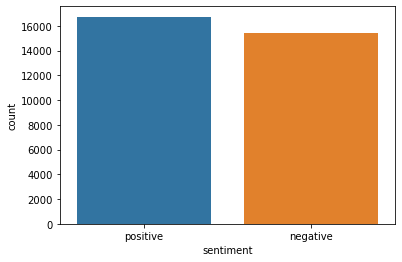

In [21]:
sns.countplot(x=df['sentiment'])

Observations -:
1. Positive sentiments are more than Negative.

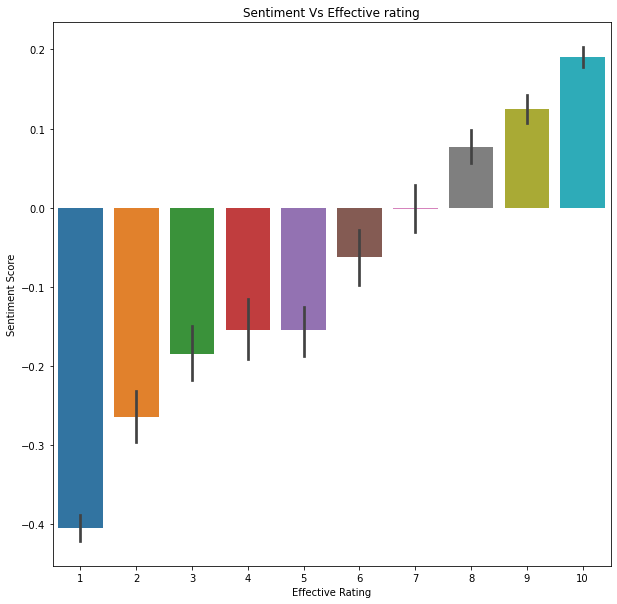

In [22]:
plt.figure(figsize=(10,10))
sns.barplot(y=df['sent_comp'], x=df['effectiveness_rating'])
plt.ylabel('Sentiment Score')
plt.xlabel('Effective Rating')
plt.title('Sentiment Vs Effective rating')
plt.show()

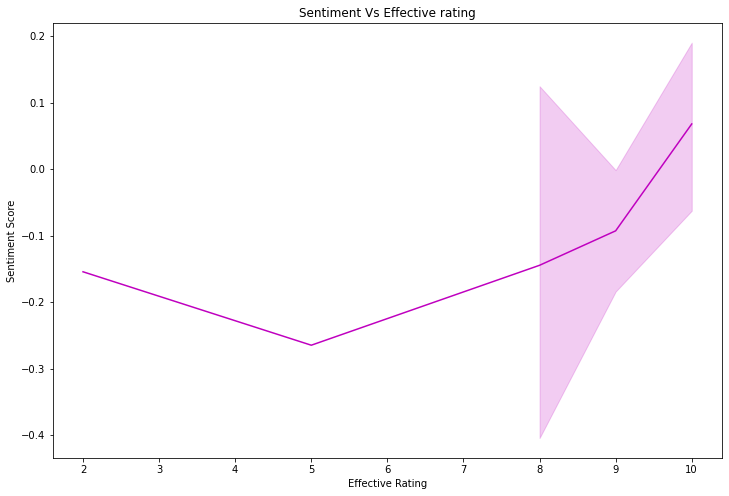

In [23]:
plt.figure(figsize=(12,8))
sns.lineplot(x=df['effectiveness_rating'], y=df.groupby('effectiveness_rating').sent_comp.mean(),color='m')
plt.ylabel('Sentiment Score')
plt.xlabel('Effective Rating')
plt.title('Sentiment Vs Effective rating')
plt.show()

Observation-:
1. Sentiment Score is lowest for Effective Rating 5.
2. Sentiment Score is highest for Effective Rating 10.
3. Maximum Density is for Effective Rating from 8 to 10.

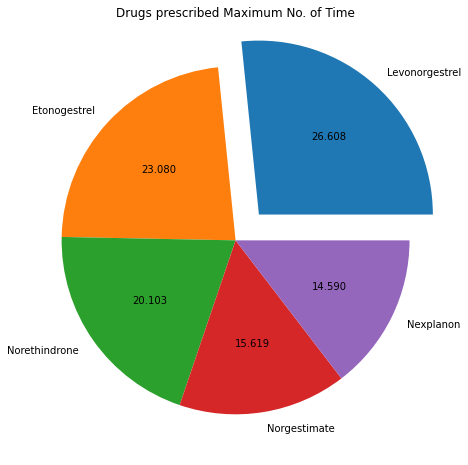

In [24]:
plt.figure(figsize=(8,8))
pielist=[724,628,547,425,397]
explode=[0.2,0,0,0,0]
plt.title('Drugs prescribed Maximum No. of Time')
plt.pie(pielist,labels=['Levonorgestrel','Etonogestrel','Norethindrone','Norgestimate',
                        'Nexplanon'],autopct='%.3f',explode=explode)
plt.show()

Observation -:
1. Maximum times prescribed drug is Levonorgestrel.
2. Levonorgestrel drug is Prescribed 26% out of first Five Prescribed Drugs.
3. No. of time Levonorgestrel Prescribed is - 724

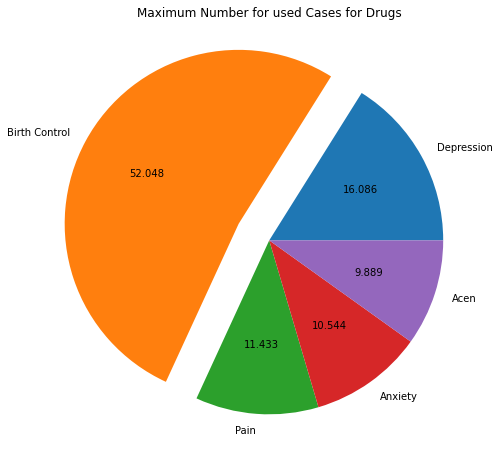

In [25]:
plt.figure(figsize=(8,8))
pielist=[1791,5795,1273,1174,1101]
explode=[0,0.2,0,0,0]
plt.title('Maximum Number for used Cases for Drugs')
plt.pie(pielist,labels=[ 'Depression','Birth Control','Pain', 'Anxiety',
                        'Acen'],autopct='%.3f',explode=explode)
plt.show()

Observation -:
1. Maximum drug prescribed is for Birth Control
2. Birth Control is used case of 52% out of First Five Use Cases.
3. Depression is found to be second highest case for drug prescription.

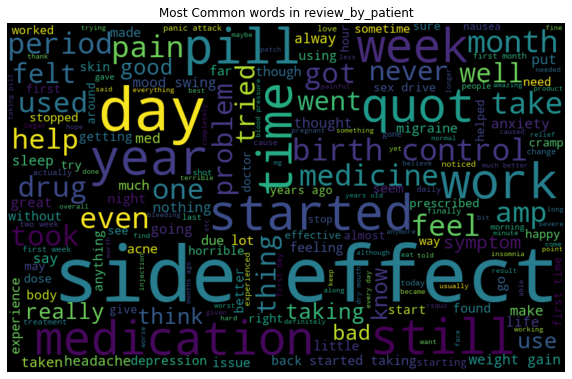

In [26]:
all_words = ' '.join([text for text in df['review_by_patient']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in review_by_patient")
plt.show()

# Feature Engineering

## Treatment of Null Values

In [27]:
df.isnull().sum()

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
sent_score                    0
sent_comp                     0
sentiment                     0
dtype: int64

Observation -:
1. There are No Null values in the Dataset

## Treatment for Outliers 

In [28]:
box = df[['effectiveness_rating', 'number_of_times_prescribed']]

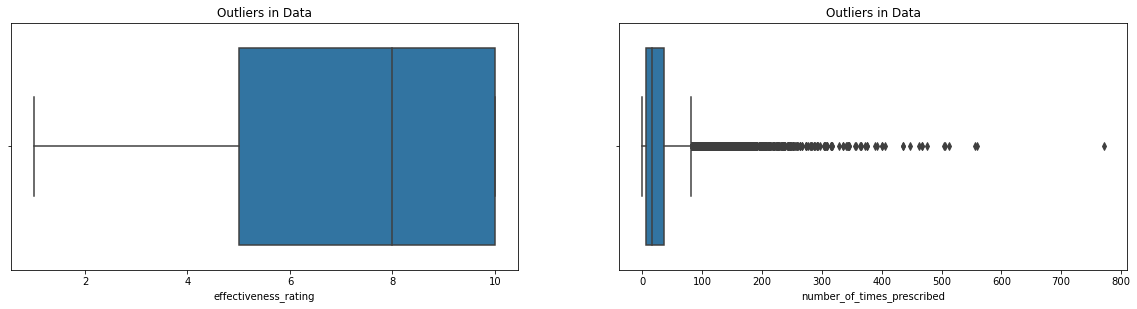

In [29]:
plt.figure(figsize=(20,10), facecolor='w')
counter = 1

for column in box:
    if counter < 4:
        ax = plt.subplot(2,2,counter)
        sns.boxplot(x=box[column])
        plt.title('Outliers in Data')
    counter += 1

Observations -:
1. There are No outliers in the Dataset

## Dropping Unnecessary Columns

In [30]:
df = df.drop(['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'drug_approved_by_UIC', 'sent_score', 'sentiment'], axis=1)

df_test = df_test.drop(['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'drug_approved_by_UIC', 'sent_score', 'sentiment'], axis=1)

## Create X & y

In [31]:
X = df.drop('base_score', axis=1)

y = df.base_score

## Scaling and Transformation

In [32]:
from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X= sc.fit_transform(X)



df_test = sc.transform(df_test)

## Feature Selection

In [33]:
df.corr()

,effectiveness_rating,number_of_times_prescribed,base_score,sent_comp
effectiveness_rating,1.000000,0.242224,0.412301,0.311685
number_of_times_prescribed,0.242224,1.000000,0.134295,0.034742
base_score,0.412301,0.134295,1.000000,0.133582
sent_comp,0.311685,0.034742,0.133582,1.000000


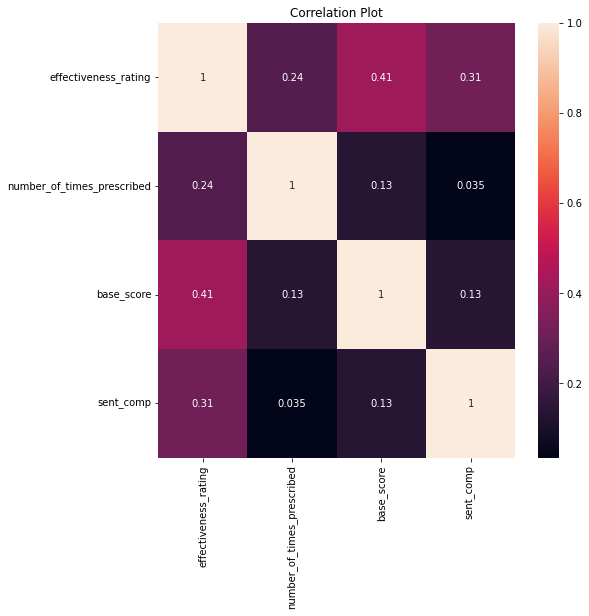

In [34]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Plot')
plt.show()

Observation -:
1. There is NO correlation between the Features.

## Model Selection and Hypermeter Tuning

In [35]:
## Model Creation

from xgboost import XGBRegressor

xgb = XGBRegressor()

In [36]:
xgb.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [37]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBRegressor(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                        
rcv.fit(X, y)
cv_best_params = rcv.best_params_ 
print(f"Best paramters: {cv_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 1.6, 'reg_alpha': 12.8, 'n_estimators': 50, 'max_depth': 8, 'learning_rate': 0.6, 'gamma': 0})


In [38]:
XGB2=XGBRegressor(reg_lambda= 1.6, reg_alpha= 012.8, n_estimators=50, max_depth=8, learning_rate=0.6, gamma=0)
XGB2.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.6, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=12.8, reg_lambda=1.6, ...)

In [39]:
pred = XGB2.predict(df_test)

In [41]:
df_s['base_score'] = pred

In [42]:
df_s.to_csv("submission.csv", index=False)

### Conclusion -:

1. The Base Score for the Drug is observed to directly Proportional to sentiment value. 